In this notebook we attempt to classify labeled images of human eyes as male or female. To do this we perform a logistic regression pixel-wise on the grayscaled images themselves.

To Do:
1. Try using all the data instead of grey scaling.
2. Try getting the elasticnet to work.
3. How to increase accuracy: do PCA to reduce number of features then apply LR.
4. Upload to GIT for version control

In [1]:
#Logistic Regression imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import csv
import PIL
import os
import time

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import shuffle

In [2]:
#read data into list of numpy arrays and resize all the images to a common size

fm_L = []
m_L = []

m = 117

fm_directory = 'female_eyes'
m_directory = 'male_eyes'

for filename in os.listdir(fm_directory):
    f = os.path.join(fm_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        image = PIL.Image.open(f)

        image = image.resize((m,m))
            
        fm_L.append(np.array(image.convert('L')).reshape(1,-1))
        
for filename in os.listdir(m_directory):
    f = os.path.join(m_directory, filename)
    # checking if it is a file
    if os.path.isfile(f):
        image = PIL.Image.open(f)
        
        image = image.resize((m,m))
            
        m_L.append(np.array(image.convert('L')).reshape(1,-1))

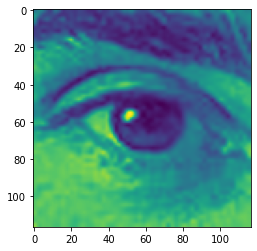

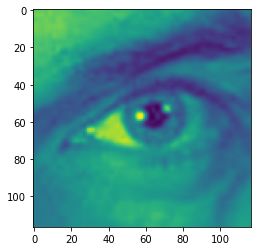

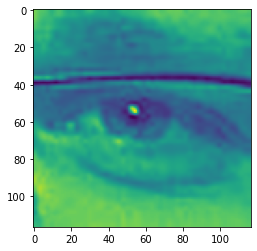

In [3]:
#examples of resized images

for i in range(3):
    a = m_L[i]
    plt.imshow(a.reshape((m,m)))
    plt.show()

###Logistic Regression

In [4]:
#make labels: female = 0, male  = 1

fm_N = len(fm_L)
m_N = len(m_L)

fm_lab = fm_N*[0]
m_lab = m_N*[1]

print('Female eyes: ' + str(fm_N))
print('Male eyes: ' + str(m_N))
print('Total eyes: ' + str(fm_N + m_N))

Female eyes: 5202
Male eyes: 6323
Total eyes: 11525


In [5]:
#randomize and split data into training and test sets

eyes, lab = shuffle(fm_L + m_L, fm_lab + m_lab)

prop_train = .1
N = int(prop_train*len(eyes))

train = np.array(eyes[:N]).reshape((N,m**2))
train_lab = np.array(lab[:N])

test = np.array(eyes[N:]).reshape((len(eyes) - N,m**2))
test_lab = np.array(lab[N:])

In [6]:
print(np.shape(train))
print(np.shape(test))
print(np.shape(train_lab))
print(np.shape(test_lab))

(1152, 13689)
(10373, 13689)
(1152,)
(10373,)


In [8]:
#Train model
#NEED TO INCREASE MAX ITER
model = LogisticRegression(solver='saga', random_state=0, max_iter = 500, penalty = 'elasticnet', l1_ratio = .5)
model.fit(train,train_lab)

#Best: prpo_train = .9, penalty = 'l1', C = .001

/Users/derekkielty/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(l1_ratio=0.5, max_iter=500, penalty='elasticnet',
                   random_state=0, solver='saga')

In [14]:
#Run model on test data
print('Results of Training Data:')
print('-----------------------------')
print('Score: ' + str(model.score(train,train_lab)))
print('-----------------------------')
print('Confusion Matrix:')
print(confusion_matrix(train_lab, model.predict(train))) #false, true, negs, pos
print('-----------------------------')
print(model.predict_proba(train).round(3)[:5])
print('-----------------------------')
print('Prediction:')
model.predict(train)[:5]

Results of Training Data:
-----------------------------
Score: 0.8061126108754338
-----------------------------
Confusion Matrix:
[[3611 1051]
 [ 960 4750]]
-----------------------------
[[0.017 0.983]
 [0.345 0.655]
 [0.296 0.704]
 [0.036 0.964]
 [0.548 0.452]]
-----------------------------
Prediction:


array([1, 1, 1, 1, 0])

In [15]:
#Run model on test data
print('Results of Test Data:')
print('-----------------------------')
print('Score: ' + str(model.score(test,test_lab)))
print('-----------------------------')
print('Confusion Matrix:')
print(confusion_matrix(test_lab, model.predict(test))) #false, true, negs, pos
print('-----------------------------')
print(model.predict_proba(test).round(3)[:5])
print('-----------------------------')
print('Prediction:')
model.predict(test)[:5]

Results of Test Data:
-----------------------------
Score: 0.8022549869904597
-----------------------------
Confusion Matrix:
[[427 113]
 [115 498]]
-----------------------------
[[0.84  0.16 ]
 [0.492 0.508]
 [0.125 0.875]
 [0.327 0.673]
 [0.846 0.154]]
-----------------------------
Prediction:


array([0, 1, 1, 1, 0])

Text(0.5, 1.0, 'Weight Corresponding to Male Eye')

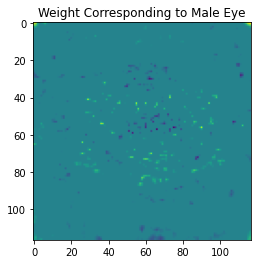

In [16]:
plt.imshow(model.coef_[0].reshape(m,m))
plt.title('Weight Corresponding to Male Eye')

Eye: female; Predicted: female.


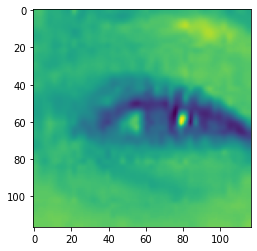

Eye: female; Predicted: male.


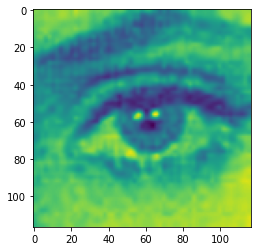

Eye: female; Predicted: female.


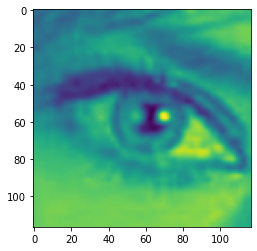

Eye: female; Predicted: female.


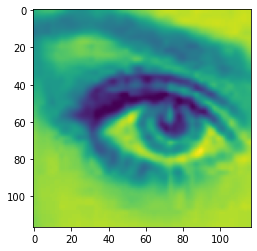

Eye: female; Predicted: female.


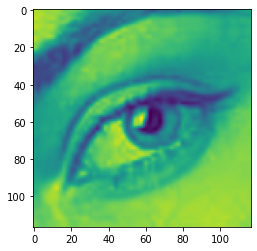

In [68]:
for i in range(5):
    if int(model.predict(test)[i]) == 0:
        pred_gen = 'female'
    else:
        pred_gen = 'male'
        
    print('Eye: female; Predicted: ' + pred_gen + '.')
    a = fm_L[i]
    s = int(np.sqrt(np.shape(a)[1]))
    plt.imshow(a.reshape((s,s)))
    plt.show()